In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig= plt.figure(dpi=192)

# Establishing formatting and colors for chart fill and edges
rural_c="#BEDDB7"
suburban_c="#FF84B5"
urban_c="#33B3FF"
rural_e= "#000000"
suburban_e= "#000000"
urban_e ="#000000"
pie_break= (0,0,0.2)

# Creating dictionaries for the colors
edges=[rural_e,suburban_e,urban_e]
colors = [rural_c,suburban_c,urban_c]

# Consolidating the colors and labels to a dictionary
tlbls = ["Rural","Suburban","Urban"]
g_dict= dict(zip(tlbls,colors))

<Figure size 1152x768 with 0 Axes>

In [23]:
csv_ride ="ride_data.csv"
csv_city="city_data.csv"

In [24]:
city_df = pd.read_csv(csv_city, encoding="utf-8")
city_df.sort_values("driver_count", ascending=False)
city_df.drop_duplicates(["city"], keep = "first", inplace=True)
#-- used for data validation ** city_df.head()

In [25]:
ride_df = pd.read_csv(csv_ride, encoding="utf-8")
ride_df.sort_values("city")
ride_df.drop_duplicates(["ride_id"], keep = False, inplace=True)
#-- used for data validation ** ride_df.head()

In [26]:
city_ride = pd.merge(ride_df,city_df, on="city")
city_ride.set_index("city").head()

,date,fare,ride_id,driver_count,type
city,,,,,
Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [27]:
city_ride["date"]= pd.to_datetime(city_ride["date"])
avg_fares = pd.Series(city_ride.groupby("city")["fare"].mean())
avg_fares= np.around(avg_fares, decimals=2)
total_rides = pd.Series(city_ride.groupby("city")["ride_id"].count())
city_ride["avg_fare"]= city_ride["city"].map(avg_fares)
city_ride["total_rides"]=city_ride["city"].map(total_rides)
city_ride= city_ride.sort_values(by=["city","driver_count"],ascending=False)
city_mod= city_ride

In [28]:
bubble_df=city_mod
bubble_df = bubble_df.drop_duplicates(["city"], keep="first")
bubble_ride = city_mod.loc[:,["city","fare","ride_id","driver_count","type","avg_fare","total_rides"]]  
bubble_ride.head()
bubble_ride["ride_count"] = bubble_ride["ride_id"].count()
bubble_ride = bubble_ride.groupby("city")["ride_count"].count()
bubble_df = bubble_df.iloc[:, [0, 4, 5, 6]]
bubble_df.sort_values(by=["city"], ascending=True)
bubble_df["ride_count"] = bubble_df["city"].map(bubble_ride)

bubble_df.set_index("city").head()
#-- used for data validation ** bubble_df.describe()
#-- used for data validation ** city_mod.to_csv("city_mod.csv", index=False, header=True)

,driver_count,type,avg_fare,ride_count
city,,,,
Zimmermanmouth,45,Urban,28.30,24
Yolandafurt,7,Urban,27.21,20
Wiseborough,55,Urban,22.68,19
Williamshire,70,Urban,26.99,31
Williamchester,26,Suburban,34.28,11


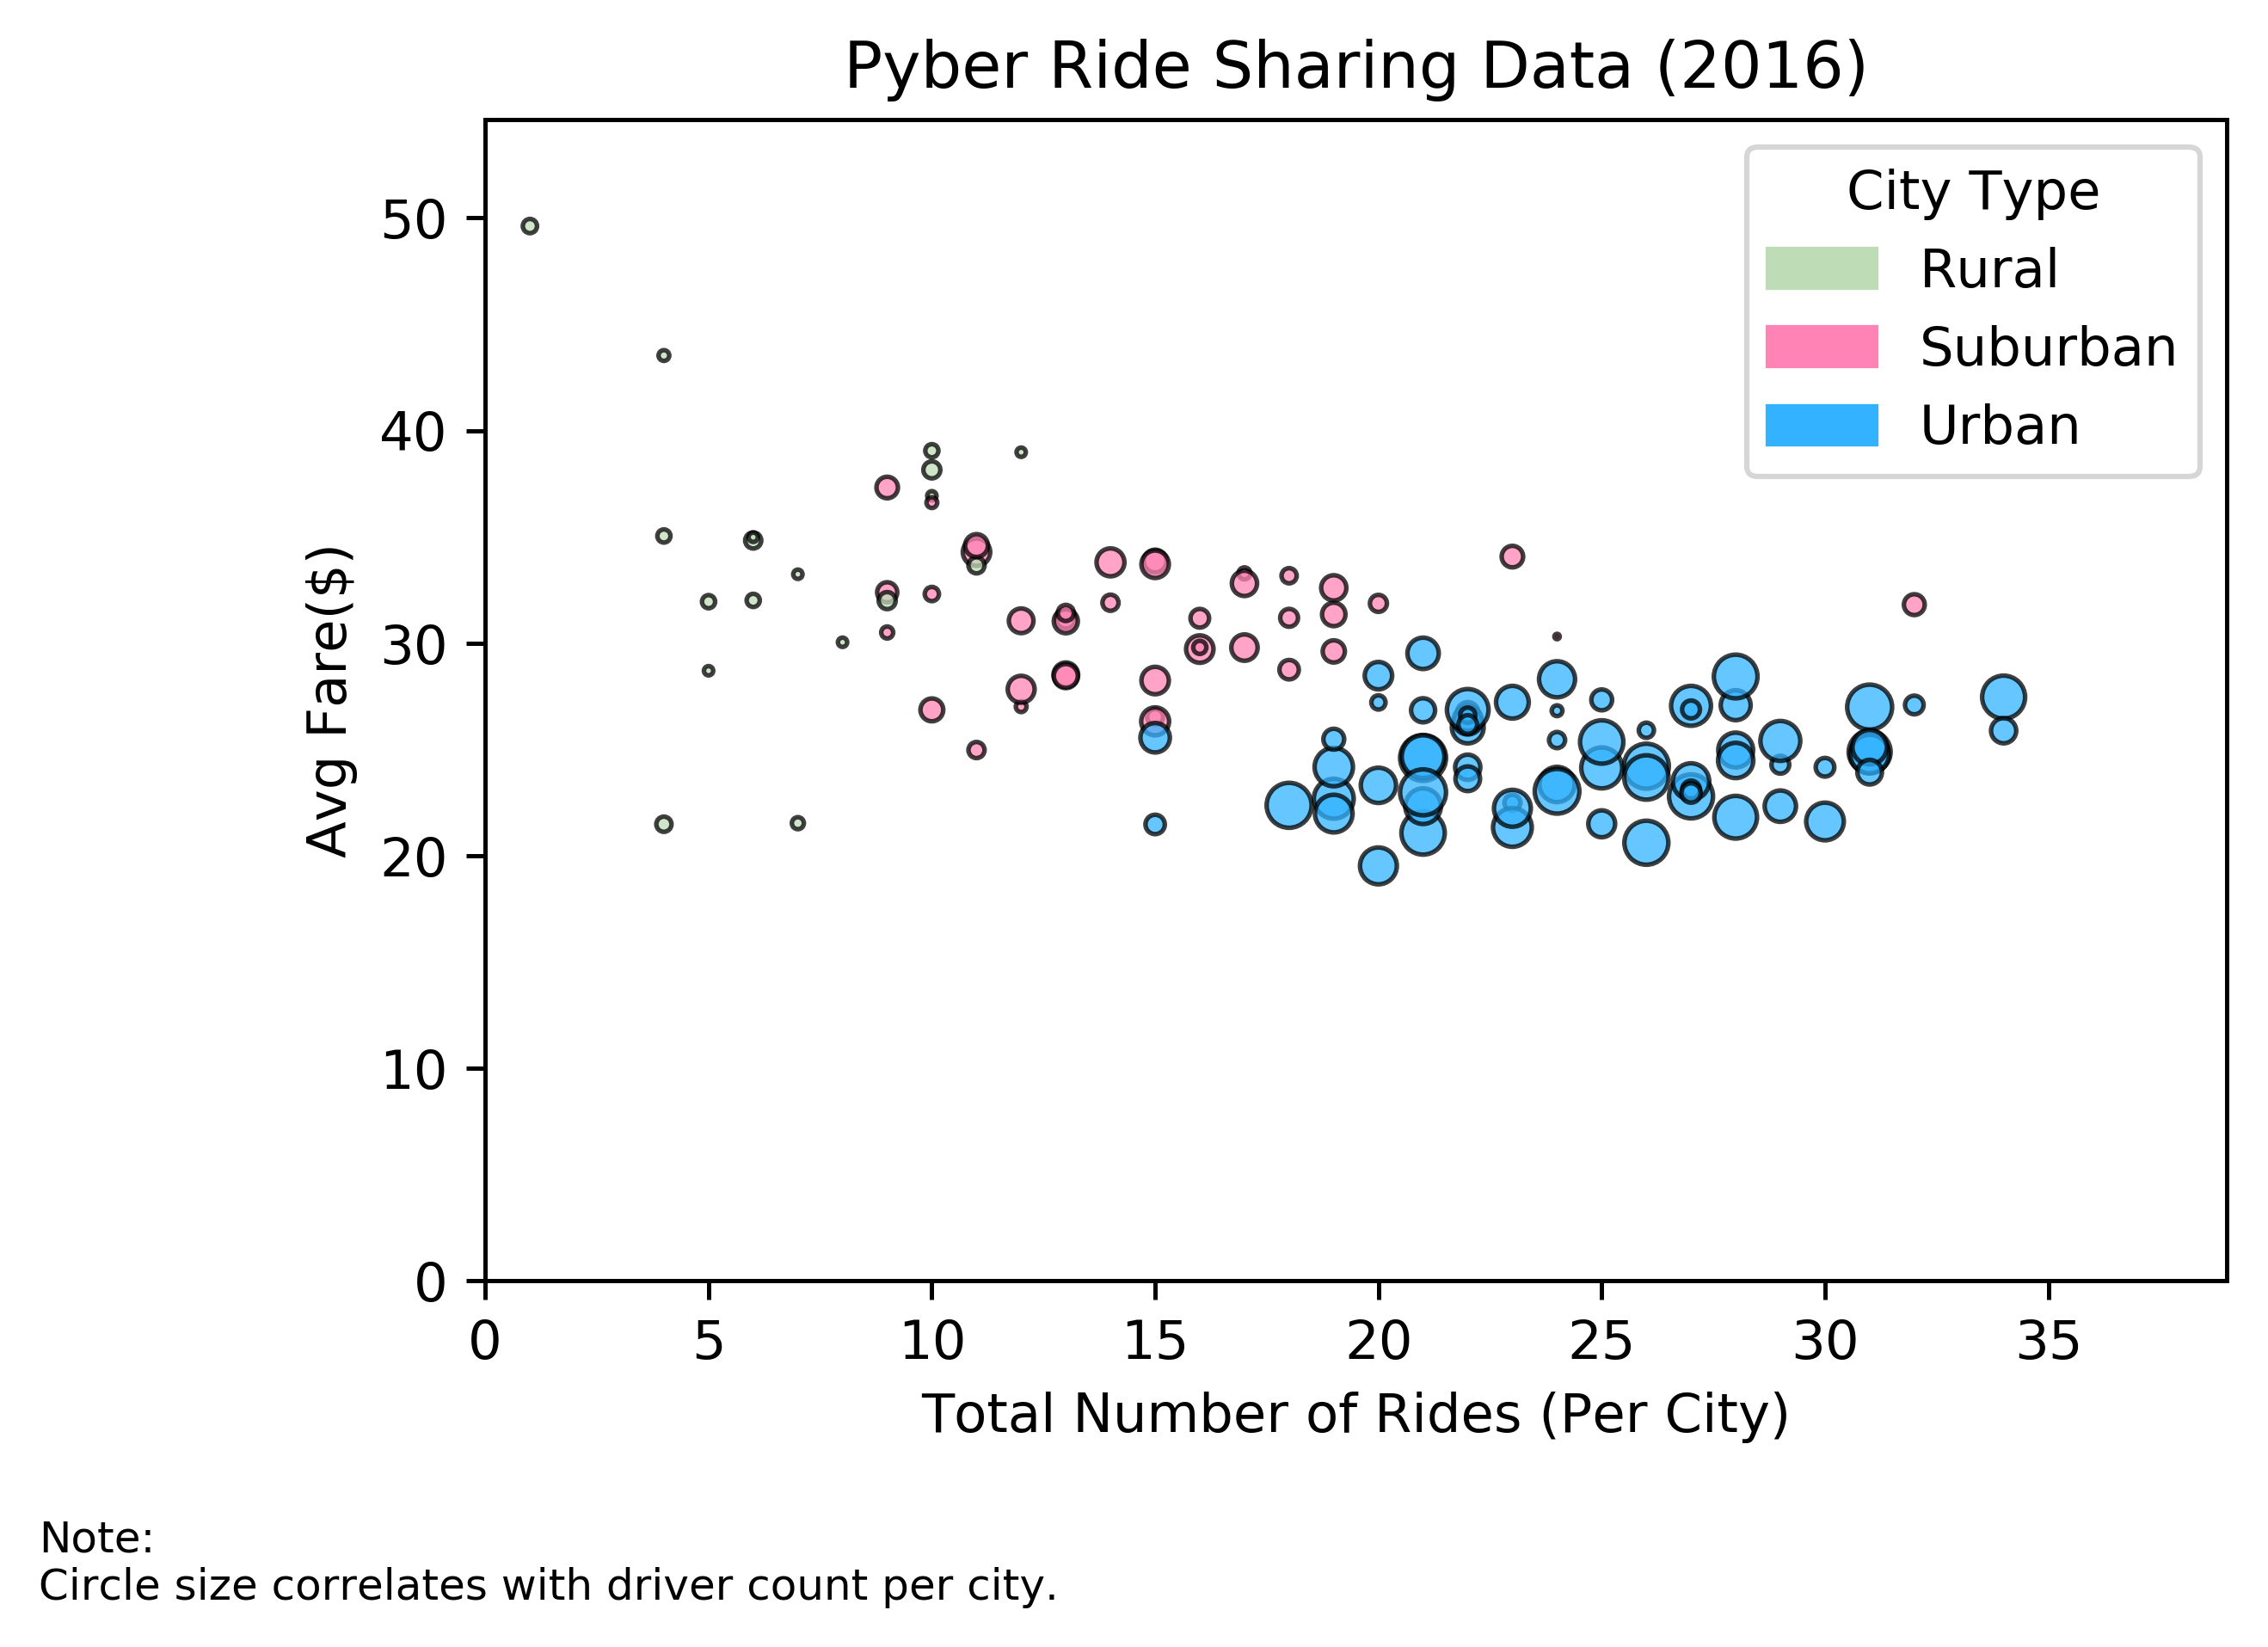

In [29]:
fig = plt.figure(dpi=450)
bub_cols = ["city", "driver_count", "type", "avg_fare","ride_count"]
ax = fig.add_axes([0.75,0.75,0.75,0.75])
x=bubble_df["ride_count"]
y=bubble_df["avg_fare"]
ax.set_xlim(0, max(bubble_df["ride_count"])+5)
ax.set_ylim(0, max(bubble_df["avg_fare"])+5)
x2= bubble_df["type"]
size=bubble_df["driver_count"]

bubble_chart = ax.scatter(x, y, s=size, color=[g_dict[ct] for ct in bubble_df["type"]], edgecolor=edges, linewidth=.85)
bubble_chart.set_alpha(.75)
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Avg Fare($)")
rural_circ = mpatches.Patch(color=rural_c, label="Rural")
suburban_circ = mpatches.Patch(color=suburban_c, label="Suburban")
urban_circ = mpatches.Patch(color=urban_c, label="Urban")
plt.legend(handles=[rural_circ,suburban_circ,urban_circ], title="City Type")
plt.text(-10,-15,"Note:\nCircle size correlates with driver count per city.", fontsize="8")
plt.show()

In [30]:
types_lbl = pd.DataFrame(city_mod["type"])
types_count = pd.DataFrame(city_mod.groupby("type")["type"].count())
types_perc = pd.DataFrame(types_count)


In [31]:
types_fares=city_mod.groupby("type")["fare"].sum()
types_fares=pd.DataFrame(types_fares)
#-- used for data validation ** types_fares

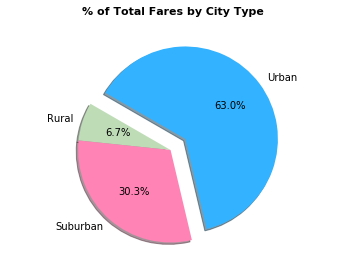

In [32]:
############## % of Total Fares by City Type##############
ax= fig.add_axes([1,1,1,1])

plt.pie(types_fares, explode=pie_break, labels=tlbls, colors=colors,
     autopct="%1.1f%%", shadow=True, startangle=150)
plt.suptitle("% of Total Fares by City Type",
            fontsize=11, fontweight="bold")
plt.show(plt.axis("equal"))


In [33]:
rides_city_type = city_ride.groupby("type")["total_rides"].count()
rides_city_type= pd.DataFrame(rides_city_type)
#-- used for data validation ** rides_city_type.head()

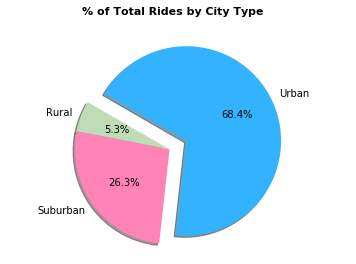

In [34]:
##############% of Total Ride by City Type##############
plt.pie(rides_city_type, explode=pie_break, labels=tlbls, colors=colors,
     autopct="%1.1f%%", shadow=True, startangle=150)
plt.suptitle("% of Total Rides by City Type",
            fontsize=11, fontweight="bold")
plt.show(plt.axis("equal"))

In [35]:
t_drivers = city_ride.drop_duplicates(["city"], keep = "first")
t_drivers = pd.DataFrame(t_drivers.groupby("type")["driver_count"].sum())
#-- used for data validation ** pd.DataFrame(t_drivers)

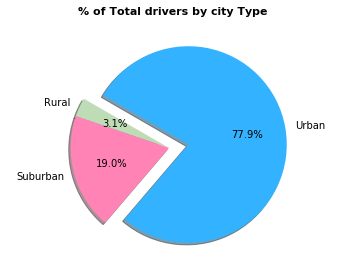

In [36]:
plt.pie(t_drivers, explode=pie_break, labels=tlbls, colors=colors,
     autopct="%1.1f%%", shadow=True, startangle=150)
plt.suptitle("% of Total drivers by city Type",
             fontsize=11, fontweight="bold")
plt.show(plt.axis("equal"))